**Uploading the Dataset in colab library.**

In [0]:
from pandas import DataFrame
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


**Reading the uploaded dataset into a variable using pandas.**

In [0]:
import pandas
df = pandas.read_csv('train.csv', encoding = "ISO-8859-1")
df=df[20000:25000]

***Importing the libraries we need. ***



Download the set of english stopwords which should be removed from the tweets.
WordCloud is imported to form wordcloud of positive and negative words.

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Cleaning of the tweets!**

Firstly remove the punctuations used in the tweets.Make use of regular expression to do it.

In [0]:
import re
import string
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['SentimentText'].apply(lambda x: remove_punct(x))
del df['SentimentText']
df.head()

,ItemID,Sentiment,Tweet_punct
20000,20012,0,ponyp hey
20001,20013,0,PrettyMess you missed all the free shots
20002,20014,0,Gore that sucks
20003,20015,0,GreenRanger aww damn you just made me realize ...
20004,20016,1,Gregatron Good looks


Then tokenize the tweets. Basically you need to break the tweets into words.

In [0]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
del df['Tweet_punct']
df.head()

,ItemID,Sentiment,Tweet_tokenized
20000,20012,0,"[, ponyp, hey, ]"
20001,20013,0,"[, prettymess, you, missed, all, the, free, sh..."
20002,20014,0,"[gore, that, sucks, ]"
20003,20015,0,"[greenranger, aww, damn, you, just, made, me, ..."
20004,20016,1,"[gregatron, good, looks, ]"


Take the set of english stopwords into a variable.

In [0]:
stopword = nltk.corpus.stopwords.words('english')

Using of the set of stopwords,check the tweets. If stopwords are present remove those stopwords.For checking make use of the tokenized tweets.

In [0]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
del df['Tweet_tokenized']
df.head()

,ItemID,Sentiment,Tweet_nonstop
20000,20012,0,"[, ponyp, hey, ]"
20001,20013,0,"[, prettymess, missed, free, shots, ]"
20002,20014,0,"[gore, sucks, ]"
20003,20015,0,"[greenranger, aww, damn, made, realize, last, ..."
20004,20016,1,"[gregatron, good, looks, ]"


Now stemming needs to be done.Stemming is the process of producing morphological variants of a root/base word. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [0]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
del df['Tweet_nonstop']
df.head()

,ItemID,Sentiment,Tweet_stemmed
20000,20012,0,"[, ponyp, hey, ]"
20001,20013,0,"[, prettymess, miss, free, shot, ]"
20002,20014,0,"[gore, suck, ]"
20003,20015,0,"[greenrang, aww, damn, made, realiz, last, upd..."
20004,20016,1,"[gregatron, good, look, ]"


Here I just renamed the "tweet_stemmed" column to "SentimentText" for my convenience.

In [0]:
df.columns=["ItemID","Sentiment","SentimentText"]
df.head()

,ItemID,Sentiment,SentimentText
20000,20012,0,"[, ponyp, hey, ]"
20001,20013,0,"[, prettymess, miss, free, shot, ]"
20002,20014,0,"[gore, suck, ]"
20003,20015,0,"[greenrang, aww, damn, made, realiz, last, upd..."
20004,20016,1,"[gregatron, good, look, ]"


**Appending the tweets and polarity into a list.**

Now iterate each row of the dataset and store the sentiment text ,that is basically the tweet, and its polarity in a list.

In [0]:
tweets = []
for  index,row in df.iterrows():
   tweets.append((row.SentimentText,row.Sentiment))
print(tweets)

[(['', 'ponyp', 'hey', ''], 0), (['', 'prettymess', 'miss', 'free', 'shot', ''], 0), (['gore', 'suck', ''], 0), (['greenrang', 'aww', 'damn', 'made', 'realiz', 'last', 'updat', 'th', 'frustrat', 'th', 'lame'], 0), (['gregatron', 'good', 'look', ''], 1), (['handz', 'coolio', 'sound', 'good', ''], 1), (['handz', 'quiet', 'unfortunatli', 'hell', 'good', 'chill', 'right', ''], 1), (['happi', 'get', 'httpbitlysyli', 'amp', 'rememb', 'use', 'code', 'carol', 'instant', 'discount', ''], 1), (['happygolucki', 'wasnt', 'meant', 'argument', 'one', 'said', 'opinion', 'alway', 'like', 'clear', 'clarifi', 'thing'], 1), (['happygolucki', 'im', 'final', 'fever', 'decid', 'work', 'today', 'thank', 'ask', 'thank', 'fb', 'comment'], 0), (['happygolucki', 'pretti', 'disgust', 'stori', 'serious', 'wtf', 'child', 'three', 'abl', 'open', 'seat', 'har'], 0), (['harrykim', 'ooc', 'know', 'im', 'sorri', ''], 0), (['harrykim', 'ooc', 'okay', 'everyth', 'okay', 'anoth', 'minut', 'two', ''], 0), (['harrykim', 'ooc

**Building the vocabulary and Matching tweets against the vocabulary.**

A vocabulary in Natural Language Processing includes all the words resident in the Training set we have.This is just creating a list of all_words we have in the Training set, breaking it into word features. Those word_features are basically a list of distinct words, each of which has its frequency as a key.
After this each word of the tweet in hand is matched with the words in the vocabulary.

In [0]:
def buildVocabulary(data):
    all_words = []
    
    for (words, sentiment) in data:
        all_words.extend(words)

    wordlist = nltk.FreqDist(all_words)
    word_features = wordlist.keys()
    
    return word_features

w_features = buildVocabulary(tweets)

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

**Splitting the dataset into train and test set.**

Import the function for splitting data to train and test sets from sklearn and define the test size.

In [0]:
from sklearn.model_selection import train_test_split 
train , test =train_test_split(tweets,test_size = 0.3)

Checking the datatype of tweet.

In [0]:
print(type(tweets))

<class 'list'>


Datatype of tweets is list so it needs to converted into dataframe.Using pandas change it to dataframe. 

In [0]:
import pandas as pd
train=pd.DataFrame(train)
test=pd.DataFrame(test)

**Checking the data in train set.**

In [0]:
train.head()

,0,1
0,"[bambi, ooooh, thank, maam, ]",1
1,"[secondstomar, httptwitpiccomddl, love, pic, w...",1
2,"[jarrel, get, follow, day, use, wwwtweeteradde...",1
3,"[, thank, recommend, bro, ]",1
4,"[snowflak, omg, tooooo, lost, lol, idk, wut, u...",0


**Renaming of columns.**

Since the name of columns have changed to 0/1 ,rename it to "SentimentText" and "Sentiment".

In [0]:
train.columns=["SentimentText","Sentiment"]
test.columns=["SentimentText","Sentiment"]

Checking the clumns of test data set


In [0]:
test.columns

Index(['SentimentText', 'Sentiment'], dtype='object')

**Separating the positive and negative sentiment tweets.**

Separate the Positive and Negative tweets of the training set in order to easily visualize their contained words.

In [0]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['SentimentText']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['SentimentText']


In [0]:
print(train_pos)

0                           [bambi, ooooh, thank, maam, ]
1       [secondstomar, httptwitpiccomddl, love, pic, w...
2       [jarrel, get, follow, day, use, wwwtweeteradde...
3                             [, thank, recommend, bro, ]
5       [abjay, pleasur, final, meet, u, send, link, p...
6       [jaredpadalecki, welcom, jare, twitter, andrea...
8                  [andonlydavid, get, tan, bed, readi, ]
9                             [mikenewton, good, night, ]
10      [starri, thank, kind, fun, turbul, stomach, ge...
12      [cb, slept, excel, akshual, even, want, read, ...
13      [stopmom, lol, meant, ask, question, radio, sh...
14                                      [indya, anytim, ]
15      [ctchmeifyoucn, play, ds, im, eat, yummi, gobs...
17      [ophelia, nice, glad, post, ive, turn, laptop,...
18      [jasperhal, hahahaha, that, get, playin, baseb...
21                          [cube, rage, couldnt, help, ]
26      [aceconcierg, thank, littl, trip, back, time, ...
28      [monke

In [0]:
print(train_neg)

4       [snowflak, omg, tooooo, lost, lol, idk, wut, u...
7                               [ff, oh, boo, suck, life]
11               [hundredperc, dont, feel, like, drive, ]
16      [wish, could, watch, nurs, jacki, full, stopbu...
19      [password, password, stop, cooper, snow, leopa...
20      [gennasay, miss, tooooo, mayb, ny, trip, next,...
22      [arner, great, expect, done, tomorowi, dont, t...
23            [trystian, tag, never, big, enough, wear, ]
24      [abhirupmishra, wazzup, kya, kar, raha, hai, s...
25      [santacruz, here, haiku, sister, like, big, le...
27      [abbybradz, miss, tweet, miss, say, horribl, i...
30                       [secondstomar, cant, go, pari, ]
32      [wayn, noth, much, day, ive, chillin, go, back...
35       [abhoopathi, expedit, avail, posit, taken, exam]
44      [marthoula, kallen, lutz, yea, u, see, trailer...
48                    [pixi, felt, trap, asthma, today, ]
50      [mia, bloodi, depress, stuff, see, hatr, got, ...
54            

As above see that, train_pos and train_neg both are lists of list, it is converted into a single list.

In [0]:
tp=train_pos.to_list()
tp1=[]
for i in tp:
    for item in i:
        tp1.append(item)
tn=train_neg.to_list()
tn1=[]
for i in tn:
    for item in i:
        tn1.append(item)

**Checking the length of positive and negative list before removing common words.**

In [0]:
print(len(tp1))
print(len(tn1))

17295
13145


In [0]:
print(tp1)
print(tn1)

['bambi', 'ooooh', 'thank', 'maam', '', 'secondstomar', 'httptwitpiccomddl', 'love', 'pic', 'wonder', 'song', 'sing', 'jarrel', 'get', 'follow', 'day', 'use', 'wwwtweeteraddercom', 'add', 'everyon', 'train', 'pay', 'vip', '', '', 'thank', 'recommend', 'bro', '', 'abjay', 'pleasur', 'final', 'meet', 'u', 'send', 'link', 'pastor', 'wive', 'get', 'chanc', 'workshop', 'awesomeh', 'leav', '', 'jaredpadalecki', 'welcom', 'jare', 'twitter', 'andrea', 'argentina', 'big', 'fan', 'sam', 'dean', '', 'andonlydavid', 'get', 'tan', 'bed', 'readi', '', 'mikenewton', 'good', 'night', '', 'starri', 'thank', 'kind', 'fun', 'turbul', 'stomach', 'get', 'fli', 'around', 'bit', 'without', 'actual', 'scari', 'home', 'good', 'cb', 'slept', 'excel', 'akshual', 'even', 'want', 'read', 'quotreal', 'silli', 'poem', 'like', 'milonar', 'may', 'stopmom', 'lol', 'meant', 'ask', 'question', 'radio', 'show', 'im', 'make', 'much', 'sens', 'tonight', '', 'indya', 'anytim', '', 'ctchmeifyoucn', 'play', 'ds', 'im', 'eat', 

**Removing of common words in both the lists.**

From both the list of positive and negative words,common words are removed by comparing both the list.

In [0]:
for i in tp1:
  if i in tn1:
    tp1.remove(i)
    tn1.remove(i)

**Checking the length after removing the common words.**

In [0]:
print(len(tp1))
print(len(tn1))

10739
6589


**Wordcloud formation**

From the list of positive and negative words wordclouds are formed.
Two wordclouds are formed one for positive words and another for negative words.

Positive words


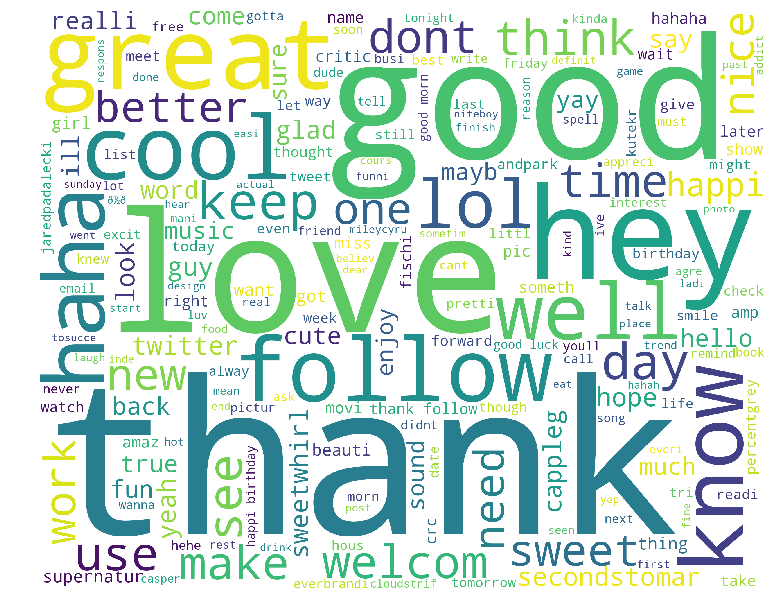

In [0]:
import re
import matplotlib.pyplot as plt
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                            and not word.startswith('@')
                            and not word.startswith('#')
                            and not len(word)<3
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(tp1,'white')

Negative words


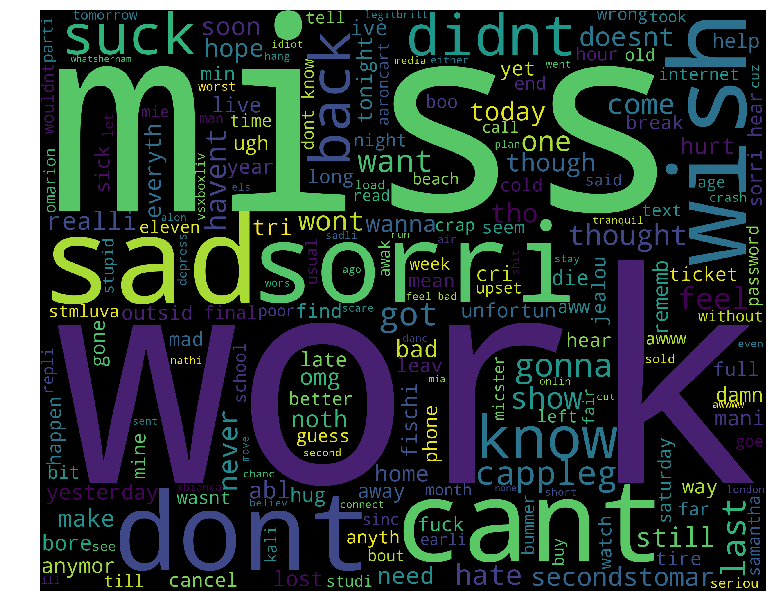

In [0]:
print("Negative words")
wordcloud_draw(tn1)

**Training of the data.**

Using the nltk NaiveBayes Classifier classify the extracted tweet word features.

In [0]:
from nltk.classify import SklearnClassifier
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

**Getting the actual sentiment of test set.**

Store the actual sentiment value of the test set into a list.

In [0]:
t=test['Sentiment'].to_list()
print(t)

[1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 

**Prediction of Polarity.**

Test the data from test set and append the result in a list.

In [0]:
li=[]
for obj in test['SentimentText']: 
    for i in obj:
      res =  classifier.classify(extract_features(obj))
    li.append(res)
      
print(li)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 

**Importing library for Confusion Matrix,Classification Report and Accuracy Score.**

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 

Print the confusion matrix,accuracy score and classification report by passing the list which contains the actual polarity value and list which contains the predicted polarity value.

In [0]:
cm=confusion_matrix(t,li)
print(cm)
print ('Accuracy Score :',100*accuracy_score(t,li)) 
print(classification_report(t,li))

[[582  67]
 [ 32 819]]
Accuracy Score : 93.4
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       649
           1       0.92      0.96      0.94       851

    accuracy                           0.93      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.93      0.93      0.93      1500

